# Capstone Project 1-Data Analysis & Data Story

## Executive Summary
Hourly PM2.5 data for five major Chinese cities are analyzed, so as their correlations with other meteorological weather data. The findings are: 
* 
* 

## 1. Introduction

### The problem:
<p>In recent years, air pollution has become an increasingly severe problem in China due to rapid industrialization and high energy consumption. The thick haze and smog, characteristic of unhealthy air condition, raise intense public concerns and media attentions, as it has been linked to the increased occurrence of various respiratory diseases and resident mortality rates. According to reports, PM2.5 (ultrafine particles less than 2.5 microns in diameter) is the main pollutant accountable for at least two thirds of the severely polluted days in Chinese major cities, posting a significant threat to human health.</p>
<p>China has started the PM2.5 monitoring and reporting program in major cities since early 2013, and has extended to 388 cities by 2015. In addition, PM2.5 data prior to 2013 are available from US embassy in major Chinese cities. However, besides live monitoring and reporting, understanding PM2.5 trends and building a PM2.5 prediction system are strongly desired. With predictions, government and citizens can plan ahead and take actions accordingly.</p>
<p>In this project, we will study the PM2.5 trends and its correlation to a variety of weather conditions, using the public datasets by UCI Repository containing hourly PM2.5 measurements for five major Chinese cities along with many other meteorological readings collected during the period of 2010-2015. The understanding and the resulting predictive model will enable people to plan ahead accordingly, reducing the hassles and economical loss due to last minute changes as well as limiting the exposure to unhealthy air.</p>

### The dataset: 
<p>PM2.5 data will be acquired from UCI Repository at https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities and https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data. The first dataset contains hourly PM2.5 measurements for five Chinese cities (Beijing included), along with many other meteorological readings collected during the period of 2010-2015. These meteorological readings include dew point, temperature, humidity, pressure, combined wind direction, cumulated wind speed and hourly precipitation etc. The second dataset contains similar measurements for city Beijing alone during the period of 2010-2014. In this project, we will focus on the first dataset, but also taking into consideration the ‘cumulative hours of snow’ and ‘cumulative hours of rain’ for city Beijing from the second dataset.</p>

<p>Two raw datasets have been imported, cleaned up and reorganized into three subsets:</p>
* pm_clean: the main dataset containing all meteorological weather data for all five cities. It's used to understand the trend of air quality (PM2.5 data) over time for five major cities, as well as the correlations between air quality (PM2.5) and other weather conditions.
* pm_stations: the side dataset containing station-specific individual PM2.5 readings. This serves the purpose of comparing the PM2.5 reading consistency among various stations in each city. This consistency is the prerequest for using the average PM2.5 readings among stations to represent the air quality(PM2.5) of each city.
* pm_sr: the side dataset containing weather data for cumulated hours of snows and rains. Although this is a smaller dataset with data only available for city 'beijing', it serves the purpose of comparing the impact of snow versus rain on air quality (PM2.5).

### The questions of interest:
This data analysis and story-telling report is organized around the following questions of interest:
* Verify data consistency by examining data collected at various locations for each city; Are they consistent and why? 
* How does air quality (PM2.5) vary among cities? Are there significant difference among five cities?
* PM2.5 trends over time: plot daily, weekly, seasonal, and yearly trends of the air quality (PM2.5 data); How does it vary with hour of the day, day of the week, season of the year, and from year to year?
* How does the air quality (PM2.5) correlate to the meteorological data (temperature, humidity, pressure, wind direction, wind speed, rain, snow, etc.)? Use EDA to identify the correlation between PM2.5 and weather conditions, rank the weather parameters accordingly.

## 2. Import modules and datasets

### 1) Import relevant modules: 

In [92]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2) Import the cleaned datasets:

**Import pm_clean dataset:**

In [2]:
#import pm_clean from 'pm_clean.csv' file and parse the strings in 'date_time' column into DateTime objects
pm_clean=pd.read_csv('pm_clean.csv',index_col=0, parse_dates=['date_time'])
print(pm_clean.head(1))

   year  month  day  hour  season  dewp  humi    pres  temp cbwd   iws  \
0  2010      1    1    23       4 -17.0  41.0  1020.0  -5.0   CV  0.89   

   precipitation  iprec     city  pm_average           date_time  
0            0.0    0.0  beijing       129.0 2010-01-01 23:00:00  


**Import pm_stations dataset:**

In [3]:
#import pm_stations from 'pm_stations.csv' file, set first column as index and parse the index to DateTime objects
pm_stations=pd.read_csv('pm_stations.csv',index_col=0, parse_dates=True)
print(pm_stations.head(1))

                     year  month  day  hour  season     city  pm_us post  \
date_time                                                                  
2010-01-01 23:00:00  2010      1    1    23       4  beijing       129.0   

                     pm_dongsi  pm_dongsihuan  pm_nongzhanguan  pm_jingan  \
date_time                                                                   
2010-01-01 23:00:00        NaN            NaN              NaN        NaN   

                     pm_xuhui  pm_city station  pm_5th middle school  \
date_time                                                              
2010-01-01 23:00:00       NaN              NaN                   NaN   

                     pm_caotangsi  pm_shahepu  pm_taiyuanjie  pm_xiaoheyan  
date_time                                                                   
2010-01-01 23:00:00           NaN         NaN            NaN           NaN  


**Import pm_sr dataset:**

In [4]:
#import pm_sr from 'pm_sr.csv' file and parse the strings in 'date_time' column into DateTime objects
pm_sr=pd.read_csv('pm_sr.csv',index_col=0, parse_dates=['date_time'])
print(pm_sr.head(1))

   year  month  day  hour       city  dewp    pres  temp cbwd   iws  pm2.5  \
0  2010      1    2     0  beijing_2 -16.0  1020.0  -4.0   SE  1.79  129.0   

    is   ir  date_time  
0  0.0  0.0 2010-01-02  


## 3. PM2.5 measurement consistency across stations
The interstation comparison is performed to understand the PM2.5 reading consistency across stations. This consistency check is of great importance, and it's performed for all five major Chinese cities (Beijing, Shanghai, Guangzhou, Chengdu and Shenyang) one by one.
This serves the fundation of future analysis, where the mean PM2.5 reading is used instead of these station specific readings. 

### 1) PM2.5 station data in capital Beijing
The hourly PM2.5 data were collected by four separate stations in Beijing. The four stations are labeled as 'pm_us post','pm_dongsi','pm_dongsihuan' and 'pm_nongzhanguan'.<br>

**Plotting hourly data by stations:**
The raw hourly PM2.5 time series data are first plotted for all four stations.

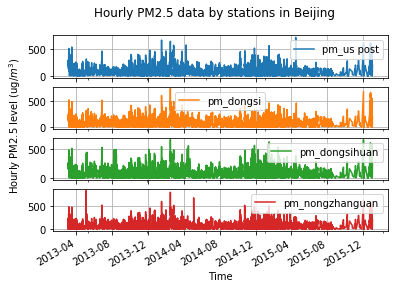

In [5]:
#extract the pm2.5 data for the four stations in city 'beijing' and drop rows with missing pm2.5 data
stations_bj = pm_stations[['pm_us post','pm_dongsi','pm_dongsihuan','pm_nongzhanguan']].dropna()

#plot the hourly PM2.5 data for four stations in Beijing
_ = stations_bj.plot(subplots=True,grid=True, title='Hourly PM2.5 data by stations in Beijing')
_ = plt.xlabel('Time')
_ = plt.ylabel('Hourly PM2.5 level (ug/$m^3$)', y=2.5)

**Plotting resampled weekly data by stations:**
The above hourly plot suggests that measurements are consistent among stations, but it is too crowded to compare the detailed features and draw conclusions. Therefore, I have resampled the hourly data by week and plot resampled data. The weekly PM2.5 plot below reveals that the PM2.5 readings by individual stations are fairly consistent with peaks and valleys all aligned well and the curves overlapping together.  

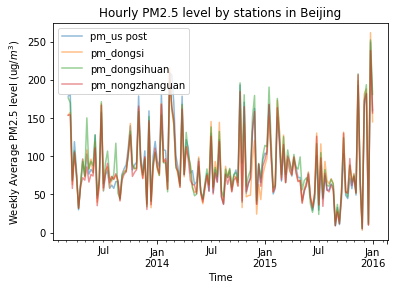

In [6]:
#resample the hourly data by day using the mean of hourly readings and plot the resampled data
stations_bj_daily = stations_bj.resample('W').mean()
_ = stations_bj_daily.plot(alpha=0.5)
_ = plt.xlabel('Time')
_ = plt.ylabel('Weekly Average PM2.5 level (ug/$m^3$)')
_ = plt.title('Hourly PM2.5 level by stations in Beijing')

**Boxplots of PM2.5 readings by stations:**
In addition, boxplots are also created to show the comparison of the summary statistics by stations. As shown below, all four stations share similar interquantile ranges with comparable medians; even the whiskers extend to similar ranges as well. The boxplot also suggests that the PM2.5 measurements are consistent among four stations. 

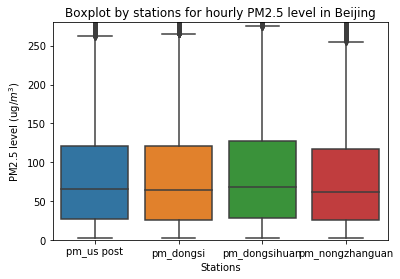

In [7]:
#melt the columns of individual station readings together for creating the boxplot by stations
stations_bj_melt = pd.melt(stations_bj,var_name='Stations',value_name='PM2.5 level (ug/$m^3$)')
_ = sns.boxplot(x='Stations',y='PM2.5 level (ug/$m^3$)',data=stations_bj_melt)
_ = plt.ylim([0,280])
_ = plt.title('Boxplot by stations for hourly PM2.5 level in Beijing')

### 2) PM2.5 station data in Shanghai, Guangzhou, Chengdu and Shenyang
The hourly PM2.5 data were also collected by separate stations for Shanghai, Guangzhou, Chengdu and Shenyang. 
Similar to the methods used in comparing stations data for Beijing, the raw hourly PM2.5 time series data are plotted by stations and shown below for cities Shanghai, Guangzhou, Chengdu and Shenyang. 
In addition, the resampled weekly data and boxplots are also plotted behind the scenes to doublecheck the consistency among stations for each of the above four cities. 

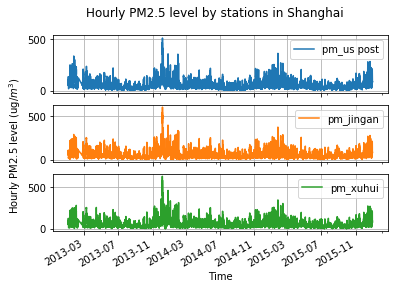

In [8]:
#extract the pm2.5 data for the three stations in city 'shanghai' and drop rows with missing pm2.5 data
stations_sh = pm_stations[['pm_us post','pm_jingan','pm_xuhui']].dropna()

#plot the hourly PM2.5 data for three stations in Shanghai
_ = stations_sh.plot(subplots=True, grid=True, title='Hourly PM2.5 level by stations in Shanghai')
_ = plt.xlabel('Time')
_ = plt.ylabel('Hourly PM2.5 level (ug/$m^3$)',y=1.5)

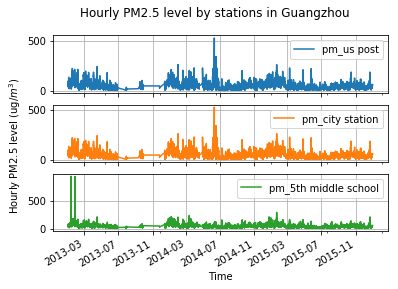

In [9]:
#extract the pm2.5 data for the three stations in city 'Guangzhou' and drop rows with missing pm2.5 data
stations_gz = pm_stations[['pm_us post','pm_city station','pm_5th middle school']].dropna()

#plot the hourly PM2.5 data for three stations in Guangzhou
_ = stations_gz.plot(subplots=True, grid=True, title='Hourly PM2.5 level by stations in Guangzhou')
_ = plt.xlabel('Time')
_ = plt.ylabel('Hourly PM2.5 level (ug/$m^3$)', y=1.5)

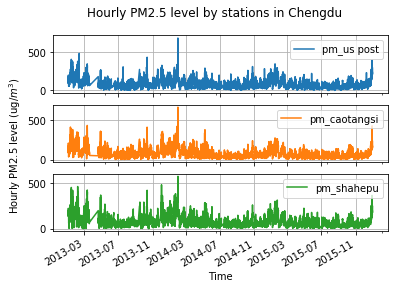

In [10]:
#extract the pm2.5 data for the three stations in city 'Chengdu' and drop rows with missing pm2.5 data
stations_cd = pm_stations[['pm_us post','pm_caotangsi','pm_shahepu']].dropna()

#plot the hourly PM2.5 data for three stations in Chengdu
_ = stations_cd.plot(subplots=True, grid=True, title='Hourly PM2.5 level by stations in Chengdu')
_ = plt.xlabel('Time')
_ = plt.ylabel('Hourly PM2.5 level (ug/$m^3$)', y=1.5)

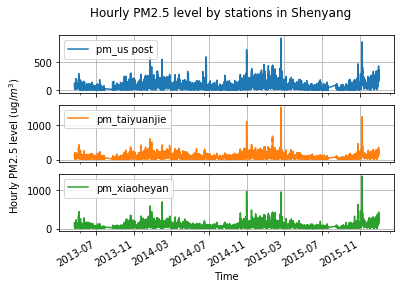

In [11]:
#extract the pm2.5 data for the three stations in city 'Shenyang' and drop rows with missing pm2.5 data
stations_sy = pm_stations[['pm_us post','pm_taiyuanjie','pm_xiaoheyan']].dropna()

#plot the hourly PM2.5 data for three stations in Shenyang
_ = stations_sy.plot(subplots=True, grid=True, title='Hourly PM2.5 level by stations in Shenyang')
_ = plt.xlabel('Time')
_ = plt.ylabel('Hourly PM2.5 level (ug/$m^3$)',y=1.5)

### 3) Summary on PM2.5 measurement consistency across stations
The interstation comparison is performed to understand the PM2.5 reading consistency across stations. The above EDA reveals:
* The PM2.5 readings are fairly consistent among individual stations for all five cities, with peaks and valleys aligned and summary statistics comparable to each other. 
* Given that PM2.5 readings are consistent among stations and there are no particular reasons to favor one station over others, it's reasonable to take the average PM2.5 of all four stations as the representative PM2.5 readings. 

This average PM2.5 data, labeled as 'pm_average', is used instead of the station-specific PM2.5 measurements in all future analysis.

## 4. PM2.5 variation among cities
To understand how the air quality (PM2.5) varies with cities, the city-specific PM2.5 data are examed from various perspectives: 
* Time series PM2.5 data are plotted to compare the PM2.5 trends over time among cities;
* Histograms are plotted to show the PM2.5 distribution by cities;
* Cumulative density function and boxplot are also plotted to provide quantitative comparisons among cities;

### 1) Extract relevant data by cities
In order to compare the PM2.5 data among cities, city-specific PM2.5 data are extracted via reorganizing the 'pm_average' column by cities.

In [12]:
# pivot pm_clean by 'city' column to extract city-specific 'pm_average' data
pmbycity = pm_clean.pivot(index='date_time',columns='city',values='pm_average')
print(pmbycity.head(1))

city                 beijing  chengdu  guangzhou  shanghai  shenyang
date_time                                                           
2010-01-01 23:00:00    129.0      NaN        NaN       NaN       NaN


### 2) Compare trends over time by cities
Time series PM2.5 data are plotted to compare the trends over time among cities. 

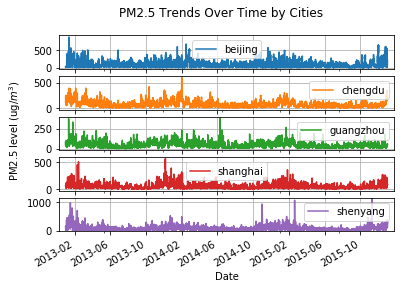

In [13]:
#plot time series PM2.5 data by cities, entries with missing data are dropped prior to plotting
_ = pmbycity.dropna().plot(subplots=True,grid=True, title='PM2.5 Trends Over Time by Cities')
_ = plt.xlabel('Date')
_ = plt.ylabel('PM2.5 level (ug/$m^3$)', y=3)
plt.margins(0.02)

As shown above, some characteristics are: 
* Five cities all have distinct PM2.5 spikes, as peak PM2.5 readings can result from many factors, for instance, local temperature, wind, etc. These factors are city specific, therefore PM2.5 spikes are not overlapping. 
* Five cities share similar trends over time: PM2.5 readings are relative higher with larger fluctuations during winter periods and lower with smaller fluctuations in summers.
* PM2.5 levels are generally higher for Beijing & Shenyang and lower for Guangzhou. This seems to indicate that Guangzhou has better air quality among the five major cities, whereas Beijing and Shenyang are worse.

### 3) Compare PM2.5 distribution among five cities
To gather a more direct comparison of PM2.5 variations by city, probability density function (PDF) are plotted by cities and overlaid for direct comparisons. 

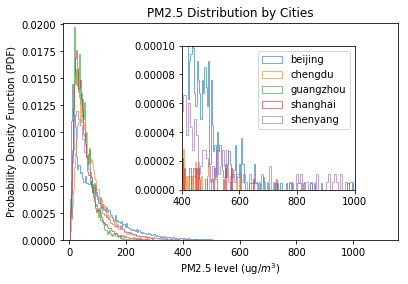

In [14]:
#plot the PDF for all five cities
for city in pmbycity.columns:
    series = pmbycity[city].dropna()
    n_bins = int(np.sqrt(len(series)))
    _ = plt.hist(series, bins=n_bins, density=True, histtype='step', alpha=0.6)
    
#format and annotation
_ = plt.xlabel('PM2.5 level (ug/$m^3$)')
_ = plt.ylabel('Probability Density Function (PDF)')
_ = plt.title('PM2.5 Distribution by Cities')
plt.margins(0.02)

#plot the inset figure showing the zoom-in view on high PM2.5 readings
_ = plt.axes([0.4,0.3,0.4,0.5])
for city in pmbycity.columns:
    series = pmbycity[city].dropna()
    n_bins = int(np.sqrt(len(series)))
    _ = plt.hist(series, bins=n_bins, density=True, histtype='step', alpha=0.6)

#format and annotate the figure insert
_ = plt.xlim([400,1000])
_ = plt.ylim([0,0.0001])
_ = plt.legend(pmbycity.columns, loc='upper right')

### 4) Compare the cumulative PM2.5 distribution among five cities
In addition to PDF, cumulative distribution functions (CDF) are also plotted by cities and overlaid for comparison purposes. 

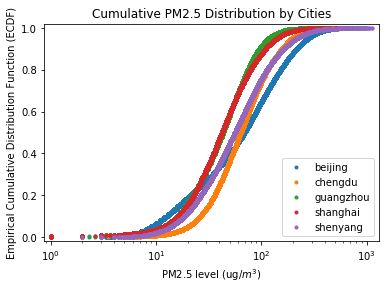

In [15]:
#user-defined funciton for computing ECDF of a given array
def ecdf(array):
    """Compute ECDF for 1D array of measurement data."""
    #sort array to use as the x axis
    x = np.sort(array)
    #use np.arange to create the y axis for cdf from 1/len to 1
    y = np.arange(1, len(array)+1)/len(array)
    #return x and y as the data for x axis and y axis, repectively
    return x,y

# Compute ECDFs for five cities, and plot all ECDFs on the same plot
for city in pmbycity.columns:
    series = pmbycity[city].dropna()
    x, y = ecdf(series)
    _ = plt.plot(x, y, marker = '.', linestyle='none')

# format and annotation
_ = plt.xscale('log')  # to see the features at low PM2.5 values, set x axis to logrithmic scale
_ = plt.legend(pmbycity.columns, loc='lower right')
_ = plt.xlabel('PM2.5 level (ug/$m^3$)')
_ = plt.ylabel('Empirical Cumulative Distribution Function (ECDF)')
_ = plt.title('Cumulative PM2.5 Distribution by Cities')
plt.margins(0.02)

Both PDF and ECDF reveal a significant difference among five cities:
* Beijing: Beijing has the widest PM2.5 spread among the five cities. Although it has more days of low PM2.5 readings (clear sky and healthy air), it also has more days of extremely high PM2.5 readings (smog and unhealthy air) than the other four cities. On average, it has the highest median reading among the five major cities. Its air quality is considered the worst overall. 
* Chengdu: Chengdu has high PM2.5 readings in general, with its median ranked second to the highest. Its overall air quality is worse than other cities, except for Beijing.
* Guangzhou: Guangzhou has lower PM2.5 readings than others, and its median is also among the lowest. It also has fewer days of high PM2.5 readings. Its air quality is considered to be the best out of the five cities overall. 
* Shanghai: Shanghai also has low PM2.5 readings overall, with its median lies among the lowest. But it has more days of high PM2.5 readings than Guangzhou, making its air quality second to the best. 
* Shenyang: Shenyang has lower PM2.5 readings than Chengdu for the most part, but it has more days of extremely high PM2.5 readings than Chengdu. Except for those extreme days, its air quality is overall slightly better than Chengdu. 

### 5) Summary statistics of PM2.5 and boxplot by cities
To show the difference among five cities quantitatively, boxplot and summary statistics are created.

city        beijing       chengdu     guangzhou      shanghai      shenyang
count  50690.000000  30502.000000  33372.000000  34795.000000  25885.000000
mean      95.183555     79.861200     51.130638     54.838866     78.301558
std       90.398005     57.083769     35.396611     44.580477     75.824575
min        1.000000      1.000000      1.000000      1.000000      2.000000
25%       27.000000     40.000000     25.666667     26.000000     31.000000
50%       69.250000     64.000000     43.000000     42.333333     56.333333
75%      132.000000    101.666667     67.333333     69.500000     98.333333
max      994.000000    600.666667    387.000000    730.000000   1134.666667


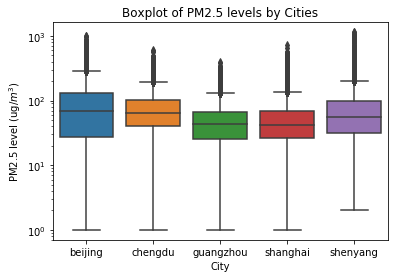

In [16]:
#plot 'pm_average' boxplot for all five cities
_ = sns.boxplot(data=pmbycity)
_ = plt.yscale('log') # set y axis to logrithmic scale for better visualization of the interquantile range
_ = plt.xlabel('City')
_ = plt.ylabel('PM2.5 level (ug/$m^3$)')
_ = plt.title('Boxplot of PM2.5 levels by Cities')

#summary statistics of 'pm_average' for five cities
print(pmbycity.describe())

### 6) Summary
The boxplot and summary statistics agree with the PDF and CDF plots. As revealed by these plots and summary statistics, the air quality ranking from the best to the worst are: Guangzhou, Shanghai, Chengdu/Shenyang, Beijing.
Among the five, Guangzhou has the most consistent low PM2.5 readings, whereas Beijing has the largest spread of PM2.5 readings. 

## 5. PM2.5 trends over time

To understand how the air quality (PM2.5) varies over time, the time series 'pm_average' data are examed from different perspective:
* The hourly PM2.5 data is plotted over time to show the overall trend;
* PM2.5 data is plotted vs hour of the day, day of the week, month of the year, season of the year, and from year to year to show the daily, weekly, monthly, seasonal and yearly trends of air quality;

### 1) Extract city-specific data
Given that five cities have distinctive PM2.5 distributions. In order to see a clear time-dependent trends without the unnecessary complication, a subset of PM2.5 data from the same city is used instead of the mixed PM2.5 data from five cities. 

In [17]:
#extract data for each specific city and store in corresponding dataframes

#city 'beijing'
bj = pm_clean[pm_clean['city']=='beijing']
#city 'chengdu'
cd = pm_clean[pm_clean['city']=='chengdu']
#city 'guangzhou'
gz = pm_clean[pm_clean['city']=='guangzhou']
#city 'shanghai'
sh = pm_clean[pm_clean['city']=='shanghai']
#city 'shenyang'
sy = pm_clean[pm_clean['city']=='shenyang']

### 2) Hourly PM2.5 trends over time
Hourly PM2.5 data in Beijing is plotted versus time. In addition, similar plots for the other four cities are also inspected behind the scenes for completeness.

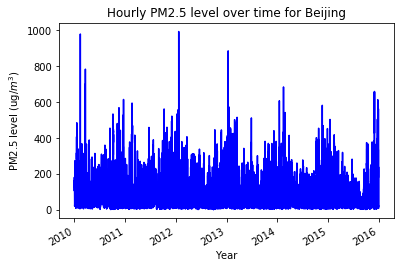

In [18]:
#plot hourly 'pm_average' data for Beijing
_ = bj.set_index('date_time').plot(y='pm_average',legend=False, color='blue')
_ = plt.xlabel('Year')
_ = plt.ylabel('PM2.5 level (ug/$m^3$)')
_ = plt.title('Hourly PM2.5 level over time for Beijing')

As shown, the hourly PM2.5 readings are relative higher with larger fluctuations during winter periods, and relative lower with smaller fluctuations in summers. The plots of the other four cities reveal similar trends. 

### 3) PM2.5 readings vs hour of the day
Hourly PM2.5 data is plotted vs hour of the day to see the daily air quality variations.
Plots are shown for all five cities, as they don't share the same trend. 

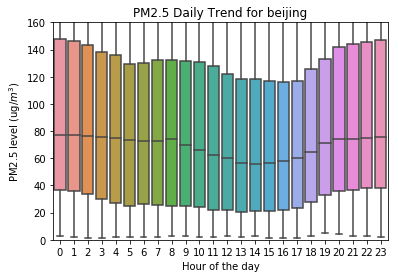

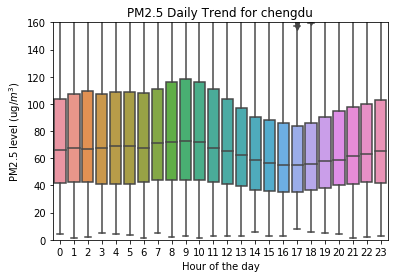

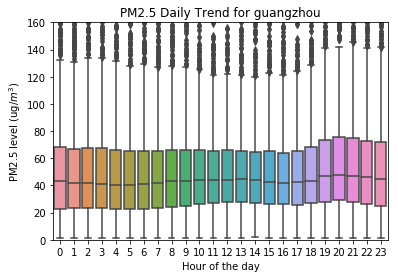

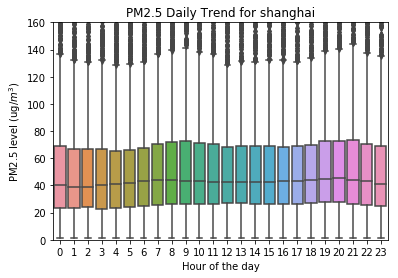

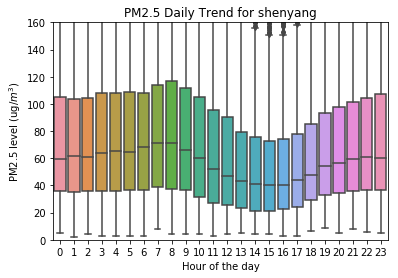

In [19]:
#plot 'pm_average' by hour of the day for five cities

for city in (bj,cd,gz,sh,sy):
    _ = sns.boxplot(x='hour',y='pm_average',data=city)
    _ = plt.ylim([0,160])
    _ = plt.xlabel('Hour of the day')
    _ = plt.ylabel('PM2.5 level (ug/$m^3$)')
    _ = plt.title('PM2.5 Daily Trend for {}'.format(city['city'].unique()[0]))
    plt.show()

Two distinct trends are observed: 
* Beijing, Chengdu, Shenyang: larger fluctuations during the 24-hour period;
PM2.5 readings rise slightly during morning rush hours (around 7-9), then drop down afterwards; The readings reach the lowest in the afternoon (around 14-16), then bound back during evening hours; The readings remain relatively high during the night. 
* Shanghai, Guangzhou: only minor fluctuations during the 24-hour period;
PM2.5 readings is slightly higher during the day, with minor increase during evening hours (19-22); during the night, readings us slightly lower.

The differences between the two distinct trends might be due to their physical locations. Shanghai and Guangzhou are coastal cities, whereas Beijing, Chengdu and Shenyang are inland cities. The correlation of PM2.5 and weather data might reveal more insights on the cause of these differences. 

### 4) PM2.5 readings vs day of the week
Hourly PM2.5 data is plotted vs day of the week to see the weekly air quality variations.
Plots are shown below for Beijing and Chengdu. Similar plots for the other three cities are inspected behind the scenes, and they share similar trends as Beijing and Chengdu.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


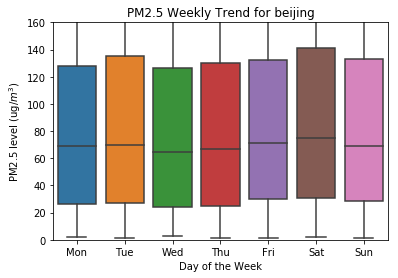

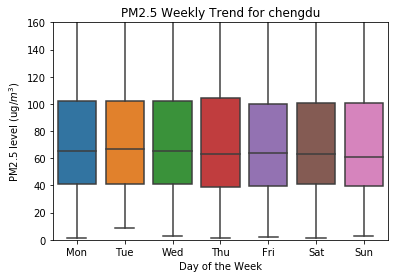

In [20]:
#plot 'pm_average' by day of the week for two representative cities

for city in (bj,cd):
    city['dayofweek'] = city['date_time'].dt.dayofweek
    _ = sns.boxplot(x='dayofweek',y='pm_average',data=city)
    _ = plt.ylim([0,160])
    _ = plt.xticks(range(7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
    _ = plt.xlabel('Day of the Week')
    _ = plt.ylabel('PM2.5 level (ug/$m^3$)')
    _ = plt.title('PM2.5 Weekly Trend for {}'.format(city['city'].unique()[0]))
    plt.show()

As shown, PM2.5 readings show minor fluctuations during the week with no clear trend observed. This is also no significant difference in PM2.5 between weekdays and weekends. 

### 5) PM2.5 readings vs month of the year
Hourly PM2.5 data is plotted vs month of the year to see the monthly air quality variations. Plots are shown for all five cities, as they show different trends.

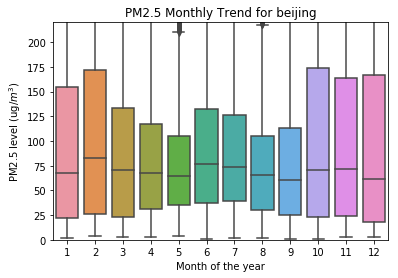

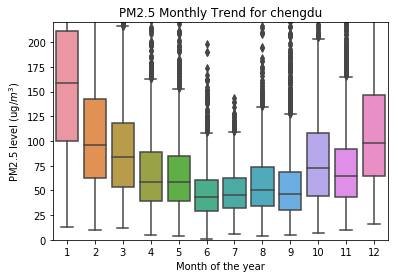

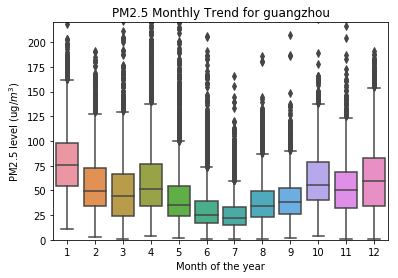

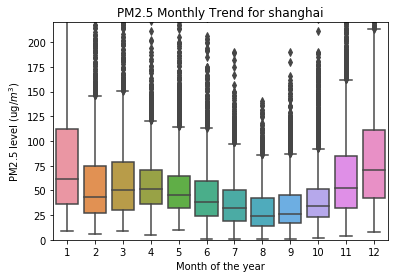

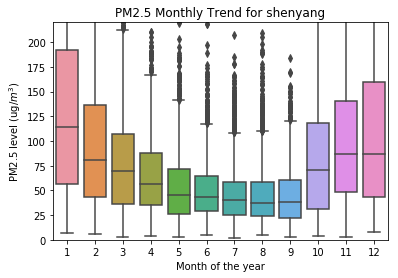

In [21]:
#plot 'pm_average' by month for five cities

for city in (bj,cd,gz,sh,sy):
    _ = sns.boxplot(x='month', y='pm_average',data=city)
    _ = plt.ylim([0,220])
    _ = plt.xlabel('Month of the year')
    _ = plt.ylabel('PM2.5 level (ug/$m^3$)')
    _ = plt.title('PM2.5 Monthly Trend for {}'.format(city['city'].unique()[0]))
    plt.show()

Two distinct trends are observed:
* Chengdu, Guangzhou, Shanghai and Shenyang: large fluctuations around the year;
These four cities share similar trends, where PM2.5 readings start to drop during spring months and reach the lowest during summer months; PM2.5 readings begin to bound up during fall months and rapidly reach the highest during winter months; In general, readings during winter months are at least twice as high as that during summer months. 
* Beijing: minor fluctuations around the year; 
PM2.5 readings in Beijing doesn't fluctuate from month to month as much as that of other cities. On the contrary, the readings are slightly higher in the summer months and slightly lower during winter and spring months. 

The differences between the two distinct trends might be due to their distinct weather conditions. The correlation between PM2.5 and weather data might reveal more insights on the cause of these differences.

### 5) PM2.5 readings vs season of the year
Hourly PM2.5 data is also plotted vs season of the year to see the seasonal air quality variations. This seasonal trend correlates to the monthly trend shown above. Similar to the monthly trends, five cities demonstrate different trends.

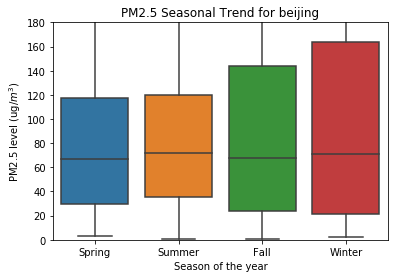

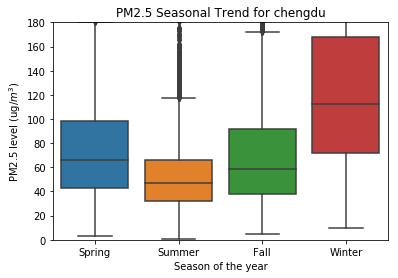

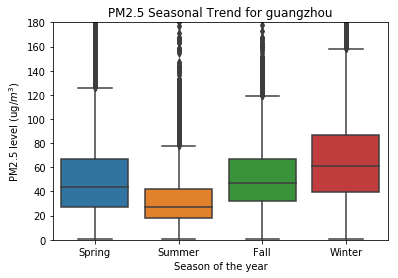

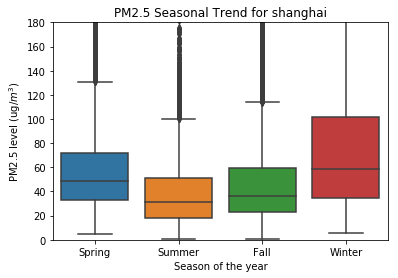

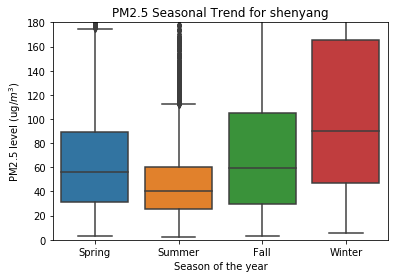

In [22]:
#plot 'pm_average' by season for five cities

for city in (bj,cd,gz,sh,sy):
    _ = sns.boxplot(x='season', y='pm_average',data=city)
    _ = plt.xticks(range(4),['Spring','Summer','Fall','Winter'])
    _ = plt.ylim([0,180])
    _ = plt.xlabel('Season of the year')
    _ = plt.ylabel('PM2.5 level (ug/$m^3$)')
    _ = plt.title('PM2.5 Seasonal Trend for {}'.format(city['city'].unique()[0]))
    plt.show()

The seasonal trends show similar features as the above monthly trends:
* PM2.5 readings for Chengdu, Guangzhou, Shanghai and Shenyang have large fluctuations around different seasons, with the lowest readings in summer and the highest readings in winter;
* PM2.5 readings for Beijing only show minor fluctuations among seasons, with readings in summer and winter slightly higher than that in spring and fall.

### 6) PM2.5 readings by year
Hourly PM2.5 data is also plotted as a function of year. This allows to see the air quality (PM2.5) changes over time.
Plots are shown below for Beijing and Chengdu. Similar plots are also plotted and inspected behind the scenes for the other three cities, and they share similar trends as Beijing and Chengdu.

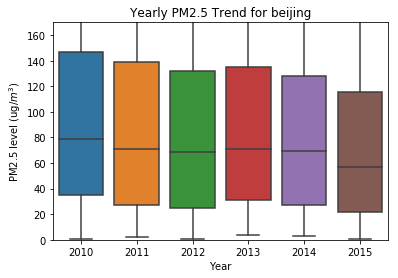

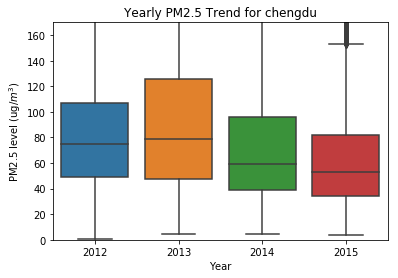

In [23]:
#plot 'pm_average' by year for two representative cities

for city in (bj,cd):
    _ = sns.boxplot(x='year',y='pm_average',data=city)
    _ = plt.ylim([0,170])
    _ = plt.xlabel('Year')
    _ = plt.ylabel('PM2.5 level (ug/$m^3$)')
    _ = plt.title('Yearly PM2.5 Trend for {}'.format(city['city'].unique()[0]))
    plt.show()

As shown above, the PM2.5 readings show a downward trend indicative of improving air quality over time, except for year 2013, where a boundback on PM2.5 reading is noticed in four out of the five cities. 
The correlation between PM2.5 and weather data might shed some light on the uniqueness of this year.   

### 7) PM2.5 distribution by month and hour
As discovered above, PM2.5 readings have strong dependences on month and hour of the day. Therefore, hourly PM2.5 readings are grouped by both month and hour of the day, and the medians are calculated and plotted for more insights. Here, medians are used instead of means because medians are less sensitive to outliers. 
All five cities are plotted and each shows distinct characteristics. 

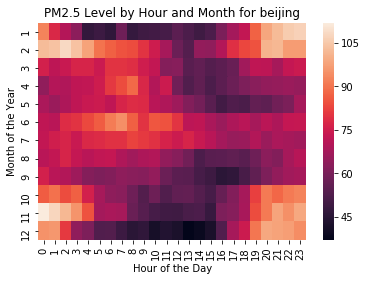

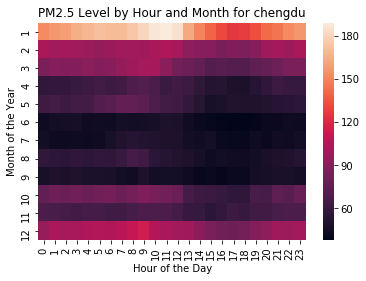

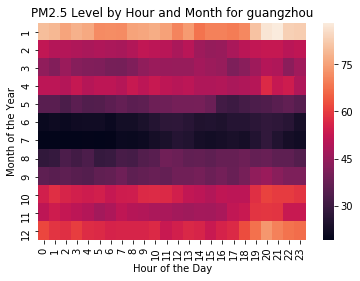

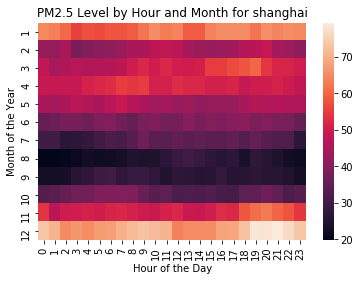

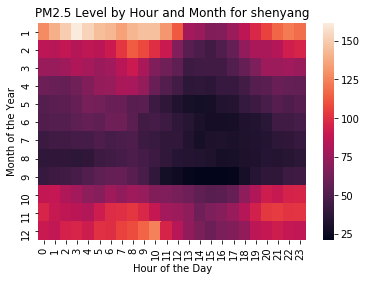

In [24]:
#plot 'pm_average' 2D distribution by month and hour for five cities

for city in (bj,cd,gz,sh,sy):
    #use median instead of the mean as the aggregation function, because median is less sensitive to outliers
    city_monhr = city.pivot_table(index='month',columns='hour',values='pm_average',aggfunc='median')
    _ = sns.heatmap(city_monhr)
    _ = plt.xlabel('Hour of the Day')
    _ = plt.ylabel('Month of the Year')
    _ = plt.title('PM2.5 Level by Hour and Month for {}'.format(city['city'].unique()[0]))
    plt.show()

All five cities have distinctive characteristics:
* Beijing: both the lowest median reading and the highest median reading appear during winter months, with the lower medians observed between 4am-15pm and the higher medians observed between 20pm-3am. Summer days in June and July have relatively higher median readings both during the day and at night; Spring and fall have intermediate median readings with lower readings during the day and higher readings at night. 
* Chengdu: Readings are at the lowest for all summer days, both during the day and at night; All spring and fall days have relatively low readings as well; Winter days, especially in January, witness a significantly higher median readings. 
* Guangzhou: Readings are at the lowest for summer days in June and July, readings remain low throughout the day and reach the minimum after midnight; Spring and fall days have intermediate readings; Readings in winter, especially in January, reach the highest. Median readings during winter peak in late evening around 20pm. 
* Shanghai: Readings are at the lowest in August and September, readings remain low throughout the day and reach the minimum around midnight; Spring, early summer and fall have intermediate readings; Readings reach the highest in December during winter time. Median readings in December peak in late evening from 19-21pm. 
* Shenyang: Readings are at the lowest for all summer days, median readings reach the minimum in the afternoon; Spring and fall have intermediate median readings with loweer readings during the day and higher readings at night; Readings reach the highest in January during winter time. Median readings in January peak after midnight around 3am. 

## 6. PM2.5 correlation to weather conditions
The aforementioned city-specific time trends strongly suggest that besides time, there are other crucial factors playing important roles in shaping the air quality (PM2.5). Weather conditions including temperature, dew point, pressure, humidity, wind direction, wind speed and precipitations, are evaluated and correlated to the PM2.5 readings.

### 1) Correlation between PM2.5 and dewpoint

The Pearson's correlation coefficient between dew point and PM2.5 is:  -0.15387253300025497


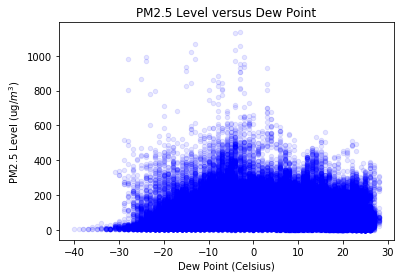

In [25]:
#extract 'dewp' and 'pm_average' columns and drop entries with any missing data
pmdewp = pm_clean[['dewp','pm_average']].dropna()

#plot scatter plot of 'pm_average' vs. 'dewp'
_ = pmdewp.plot(x='dewp',y='pm_average',kind='scatter',color='blue',alpha=0.1)
_ = plt.xlabel('Dew Point (Celsius)')
_ = plt.ylabel('PM2.5 Level (ug/$m^3$)')
_ = plt.title('PM2.5 Level versus Dew Point')

#calculate correlation coefficient
r = np.corrcoef(pmdewp['dewp'],pmdewp['pm_average'])[0,1]
print("The Pearson's correlation coefficient between dew point and PM2.5 is: ", r)

The scatter plot and the Pearson's correlation coefficient suggest that there is not a signicant correlation between PM2.5 readings and dew point. But the extremely high PM2.5 levels are mostly associated with low dew point conditions. 

### 2) Correlation between PM2.5 and temperature

The Pearson's correlation coefficient between temperature and pm2.5 is:  -0.27351759310962287


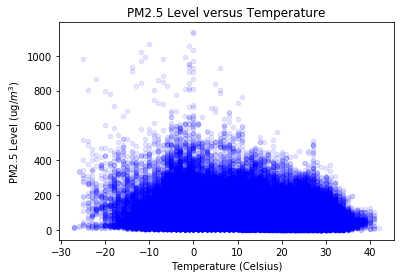

In [26]:
#extract 'temp' and 'pm_average' columns and drop entries with any missing data
pmtemp = pm_clean[['temp','pm_average']].dropna()

#plot scatter plot of 'pm_average' vs. 'temp'
_ = pmtemp.plot(x='temp',y='pm_average',kind='scatter', color='blue', alpha=0.1)
_ = plt.xlabel('Temperature (Celsius)')
_ = plt.ylabel('PM2.5 Level (ug/$m^3$)')
_ = plt.title('PM2.5 Level versus Temperature')

#calculate correlation coefficient
r = np.corrcoef(pmtemp['temp'],pmtemp['pm_average'])[0,1]
print("The Pearson's correlation coefficient between temperature and pm2.5 is: ", r)

The scatter plot and the Pearson's correlation coefficient suggest that there is not a signicant correlation between PM2.5 readings and temperature. Similar to the trend with dew point, the extremely high PM2.5 levels are mostly associated with low temperature conditions (cold weather). 

### 3) Correlation between PM2.5 and pressure

The Pearson's correlation coefficient between pressure and pm2.5 is:  0.18623154503408526


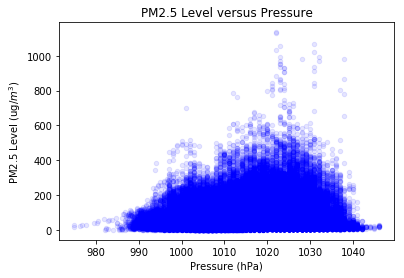

In [27]:
#extract 'pres' and 'pm_average' columns and drop entries with any missing data
pmpres = pm_clean[['pres','pm_average']].dropna()

#plot scatter plot of 'pm_average' vs. 'pres'
_ = pmpres.plot(x='pres',y='pm_average',kind='scatter', color='blue',alpha=0.1)
_ = plt.xlabel('Pressure (hPa)')
_ = plt.ylabel('PM2.5 Level (ug/$m^3$)')
_ = plt.title('PM2.5 Level versus Pressure')

#calculate correlation coefficient
r = np.corrcoef(pmpres['pres'],pmpres['pm_average'])[0,1]
print("The Pearson's correlation coefficient between pressure and pm2.5 is: ", r)

The scatter plot and the Pearson's correlation coefficient suggest that there is not a signicant correlation between PM2.5 readings and pressure. However, the extremely high PM2.5 levels are mostly associated with higher atmospheric pressure.

### 4) Correlation between PM2.5 and humidity

The Pearson's correlation coefficient between humidity and pm2.5 is:  0.1299623416871101


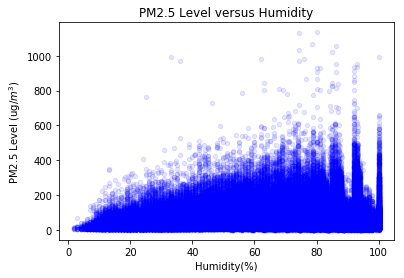

In [28]:
#extract 'humi' and 'pm_average' columns and drop entries with any missing data
pmhumi = pm_clean[['humi','pm_average']].dropna()

#plot scatter plot of 'pm_average' vs. 'humi'
_ = pmhumi.plot(x='humi',y='pm_average',kind='scatter',color='blue',alpha=0.1)
_ = plt.xlabel('Humidity(%)')
_ = plt.ylabel('PM2.5 Level (ug/$m^3$)')
_ = plt.title('PM2.5 Level versus Humidity')

#calculate correlation coefficient
r = np.corrcoef(pmhumi['humi'],pmhumi['pm_average'])[0,1]
print("The Pearson's correlation coefficient between humidity and pm2.5 is: ", r)

The scatter plot and the Pearson's correlation coefficient suggest that there is not a signicant correlation between PM2.5 readings and humidity.

### 5) Correlation between PM2.5 and wind direction
Note: wind direction in this dataset is classified into the following five categories: Northwest(NW), Northeast(NE), Southeast(SE), Southwest (SW) and static wind (CV).

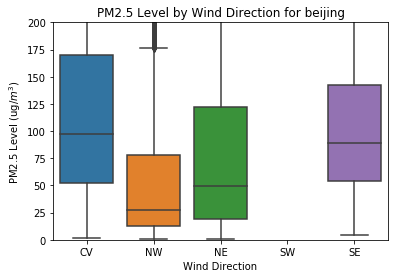

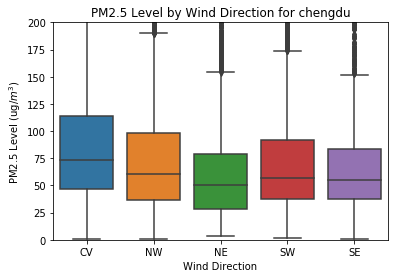

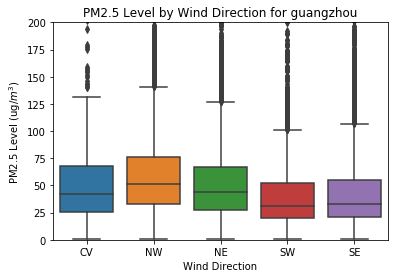

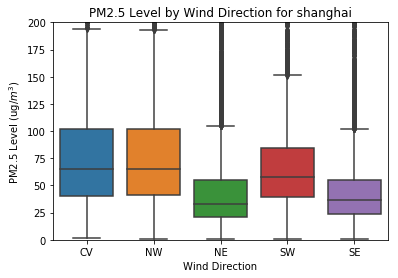

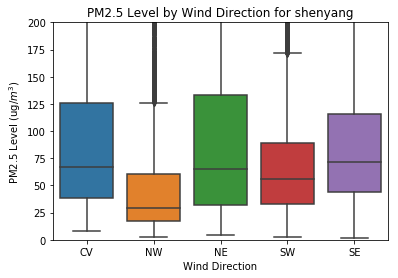

In [90]:
#plot 'pm_average' distribution by 'cbwd' for five cities

for city in (bj,cd,gz,sh,sy):
    _ = sns.boxplot(x='cbwd',y='pm_average',data=city, order=['CV','NW','NE','SW','SE'])
    _ = plt.ylim([0,200])
    _ = plt.xlabel('Wind Direction')
    _ = plt.ylabel('PM2.5 Level (ug/$m^3$)')
    _ = plt.title('PM2.5 Level by Wind Direction for {}'.format(city['city'].unique()[0]))
    plt.show()

PM2.5 readings strongly depend on the wind directions. The dependence is city specific, as determined by the location and neighbour environment of the city.

### 6) Correlation between PM2.5 and wind speed
<p>As shown above, the correlation between PM2.5 and wind varies from city to city, and is strongly dependent on wind directions. Therefore, to understand the correlation between PM2.5 and wind speed, relevant data are categorized by wind directions and plotted for each city.</p>
<p>Note: 'iws' column records the cumulated wind speed over time, but the numbers in this column were periodically reset to zero when wind direction alter, causing artifacts. Therefore, it makes more sense to extract the hourly wind speed data from 'iws' and evalutate the correlation between PM2.5 and hourly wind speed instread.</p>

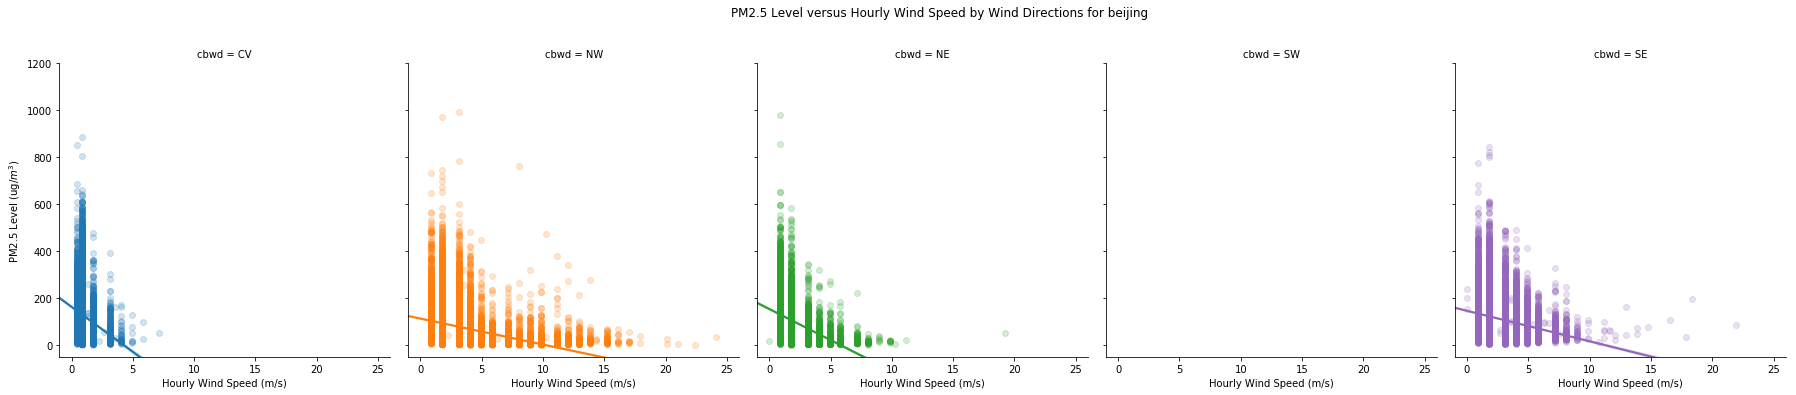

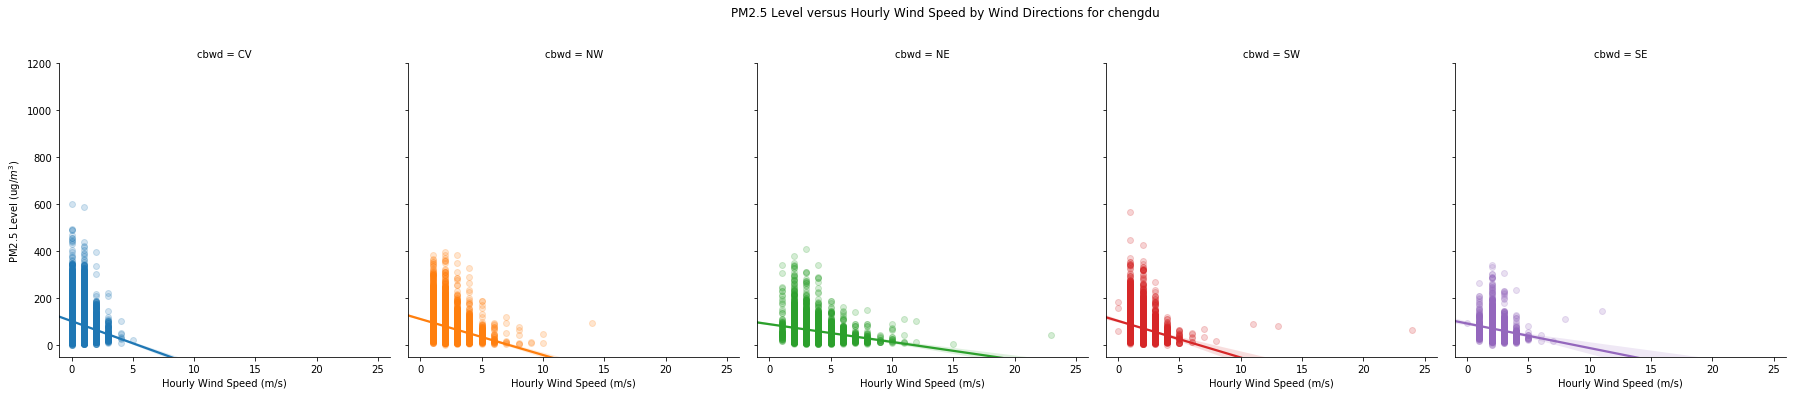

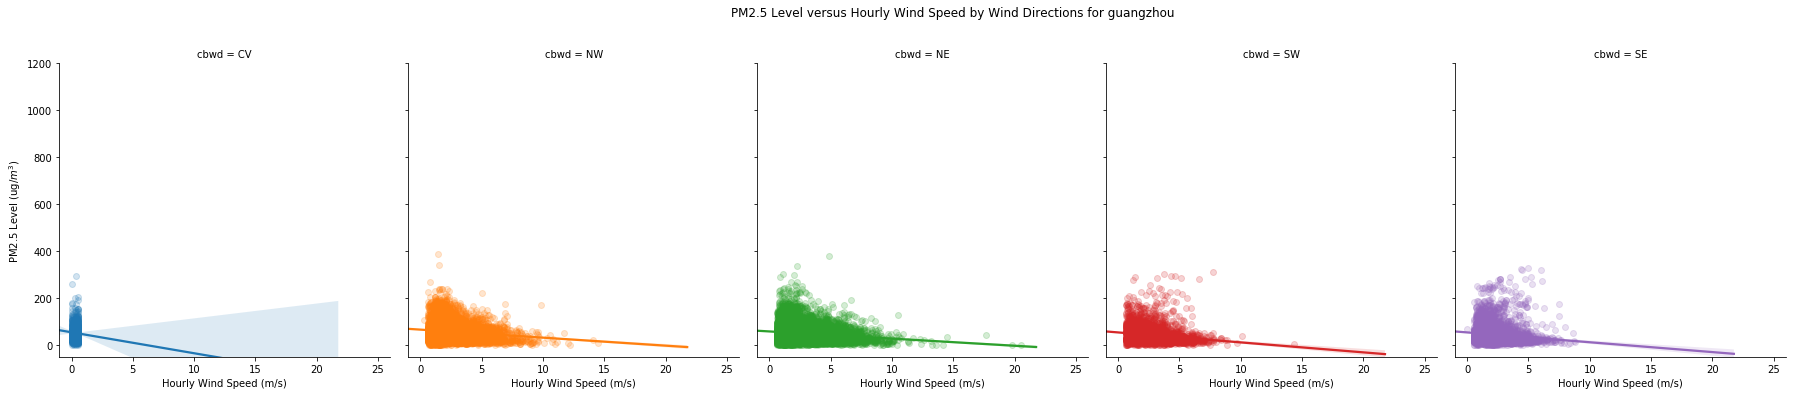

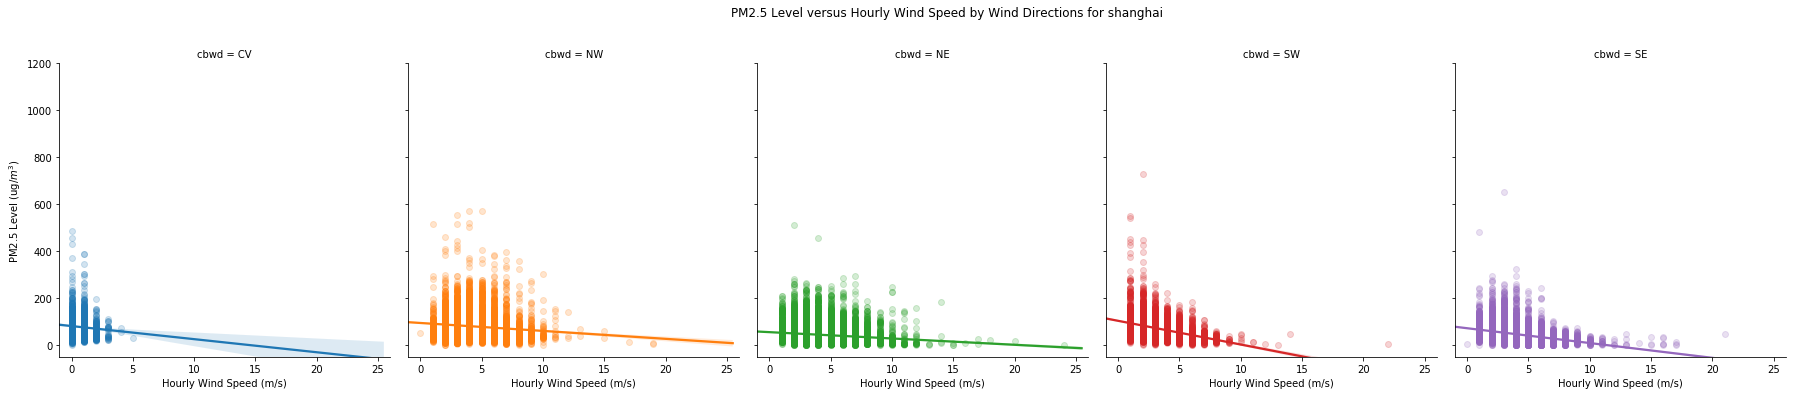

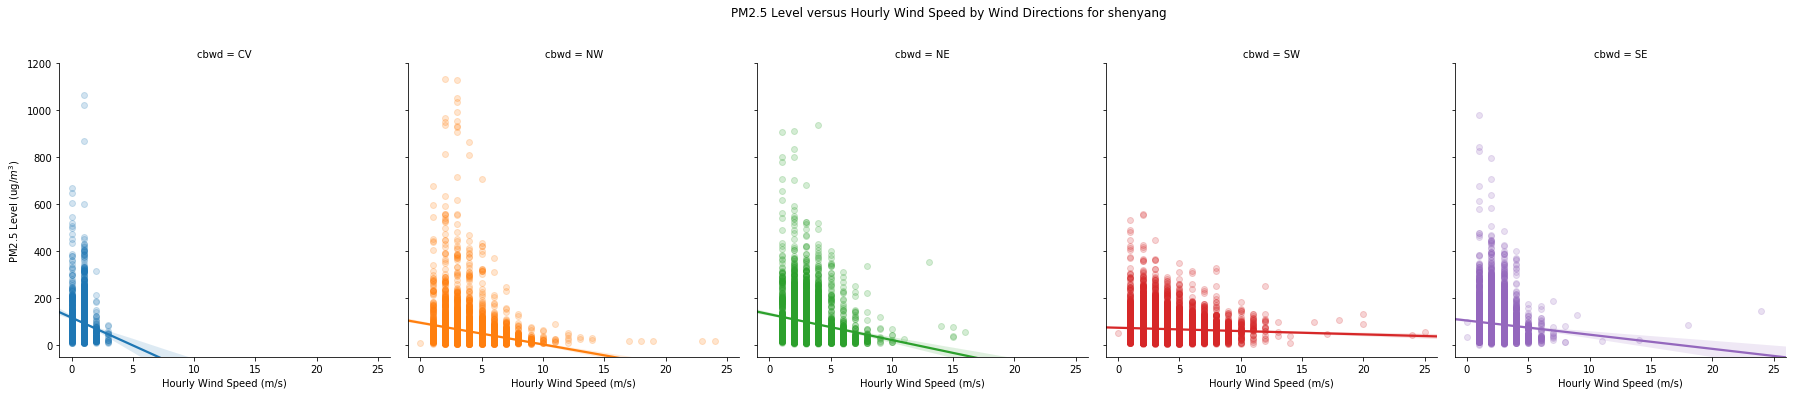

In [94]:
#plot 'pm_average' vs. hourly wind speed categorized by 'cbwd' for all five cities

for city in (bj, cd, gz, sh, sy):
    #calculate hourly wind speed from cumulated wind speed by taking into consideration the periodic resets to zero

    #extract only relevant columns, drop missing data and update index
    pm_ws = city[['iws', 'cbwd','pm_average']].dropna().reset_index(drop=True)
    #create a new column 'ws' to store the hourly wind speeds and initialize the values to NaN
    pm_ws['ws'] = np.nan

    #loop over rows and compute hourly wind speed using cumulated wind speed 'iws'
    for idx in range(len(pm_ws)):
        #for the first entry, cumulated wind speed is equivalent to hourly wind speed
        if idx == 0: 
            pm_ws.loc[idx, 'ws'] = pm_ws.loc[idx, 'iws']
            continue    
        #if the wind direction remains the same and the cumulated wind speed is increasing in number, substract previous 'iws' from current 'iws' to compute the hourly wind speed
        if pm_ws.loc[idx,'cbwd'] == pm_ws.loc[idx-1,'cbwd'] and pm_ws.loc[idx,'iws'] >= pm_ws.loc[idx-1,'iws']: 
            pm_ws.loc[idx,'ws'] = pm_ws.loc[idx,'iws'] - pm_ws.loc[idx-1,'iws']
        #otherwise, cumulated wind speed in this row is not cumulative, assign it directly to the 'ws' column
        else:
            pm_ws.loc[idx,'ws'] = pm_ws.loc[idx,'iws']

    #wind speed of 25 m/s is considered to be very strong storm with significant structural damage
    #drop entries with hourly wind speed above 25 m/s, since they are likely to be outliers
    pm_ws = pm_ws[pm_ws['ws'] <= 25]

    #plot 'pm_average' vs. 'ws' categorized by 'cbwd'
    g = sns.lmplot(x='ws', y='pm_average', data=pm_ws, fit_reg=True, col='cbwd', hue='cbwd', col_order=['CV','NW','NE','SW','SE'], hue_order=['CV','NW','NE','SW','SE'],scatter_kws={'alpha':0.2})
    _ = g.set(xlim=(-1,26), ylim=(-50,1200))
    _ = g.set_axis_labels('Hourly Wind Speed (m/s)', 'PM2.5 Level (ug/$m^3$)')
    _ = plt.annotate('vfor {}'.format(city['city'].unique()[0]), xy=(0,0),xytext=(-60,1400), size=12)
    plt.show()

* Static winds feature low wind speeds (<5 m/s), with limited impact on reducing PM2.5 levels.
* Beijing: Winds from northwest are the strongest among all. Winds from northeast (NE) are most effective at reducing high PM2.5 readings, followed by the winds from southeast (SE), whereas some high PM2.5 levels (>200) are still observed at northwest(NW) winds of speeds above 10 m/s.
* Chengdu: The PM2.5 levels are generally lower than Beijing. The northeast winds are the strongest, followed by northwest winds, then winds from the south. All wind directions show that as wind speed increases, the PM2.5 level drops. But the effect is the most significant with southwest winds.
* Guangzhou: The PM2.5 levels are generally the lowest among all cities. Winds from the north (NE, NW) are stronger than winds from the south (SE, SW). Higher wind speeds help to reduce PM2.5 levels, but the effect is very limited here, probably due to the relatively low PM2.5 levels.</p>
* Shanghai: Winds from the east (NE, SE) are stronger than winds from the west (SW, NW). All wind directions show that higher wind speeds help to reduce PM2.5 levels, but the effect is the most prominent with southwest winds.</p>
* Shenyang: The PM2.5 levels are generally higher. Winds from the west (NW, SW) are stronger than winds from the east (NE, SE). All wind directions show that higher wind speeds help to reduce PM2.5 levels, but the effect is the most prominent with winds from the east (NE, SE).</p>

<p>Although the trend is unique with each city, when comparing the plots 'PM2.5 Level by Wind Direction' with the plot 'PM2.5 Level versus Hourly Wind Speed by Wind Directions', the following common characteristics are concluded: </p>
* Higher wind speeds help to reduce PM2.5 levels, this has been observed with all wind directions in all cities; 
* Static winds feature low wind speeds (<5 m/s), therefore they have limited effect on reducing PM2.5 levels; 
* The wind direction with higher wind speeds has smaller PM2.5 median value and interquantile values;
* The wind direction with a stronger correlation between wind speed and PM2.5 has broader PM2.5 interquantile ranges, this is true because PM2.5 level varies more with wind speed and causes wider distribution of PM2.5.

### 7) Correlation between PM2.5 and precipitation
Correlation between PM2.5 and precititation is studied using combined data from all five cities. Data for individual cities are also inspected behind the scenes. Plots by city demonstrate similar trends.
PM2.5 readings are plotted versus hourly precipitation, as well as cumulative precipitation. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


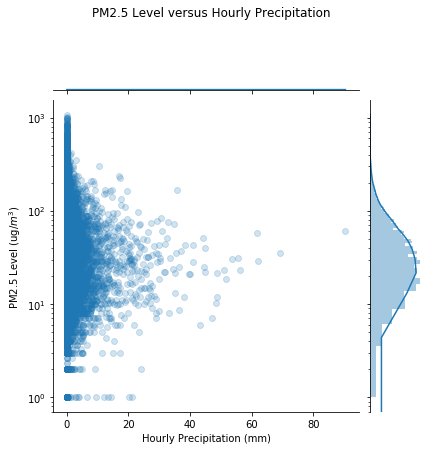

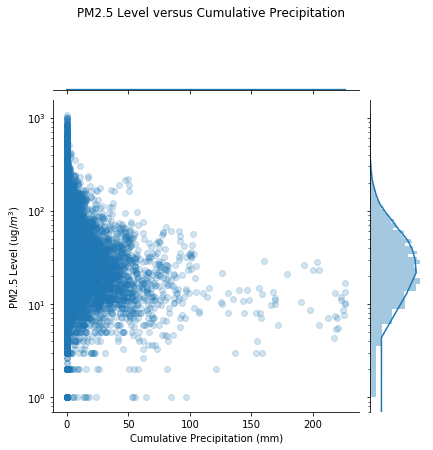

In [66]:
#plot PM2.5 readings vs hourly precipitation
#extract 'precipitation' and 'pm_average' columns and drop entries with any missing data
pmprec = pm_clean[['precipitation','pm_average']].dropna()

#plot jointplot of 'pm_average' vs. 'precipitation'
g = sns.JointGrid(x='precipitation',y='pm_average',data=pmprec)
_ = g.plot_joint(plt.scatter, alpha=0.2)
_ = g.plot_marginals(sns.distplot, hist=True, kde=True, bins=int(np.sqrt(len(pmprec))))
_ = g.ax_joint.set_yscale('log')
_ = g.ax_marg_y.set_yscale('log')
_ = g.set_axis_labels(xlabel='Hourly Precipitation (mm)',ylabel='PM2.5 Level (ug/$m^3$)')
_ = plt.title('PM2.5 Level versus Hourly Precipitation',x=-3,y=1.25)

#plot PM2.5 readings vs cumulative precipitation
#extract 'iprec' and 'pm_average' columns and drop entries with any missing data
pmiprec = pm_clean[['iprec','pm_average']].dropna()

#plot jointplot of 'pm_average' vs. 'iprec'
g = sns.JointGrid(x='iprec',y='pm_average',data=pmiprec)
_ = g.plot_joint(plt.scatter, alpha=0.2)
_ = g.plot_marginals(sns.distplot, hist=True, kde=True, bins=int(np.sqrt(len(pmiprec))))
_ = g.ax_joint.set_yscale('log')
_ = g.ax_marg_y.set_yscale('log')
_ = g.set_axis_labels(xlabel='Cumulative Precipitation (mm)',ylabel='PM2.5 Level (ug/$m^3$)')
_ = plt.title('PM2.5 Level versus Cumulative Precipitation',x=-3,y=1.25)

Precipitation helps to reduce high PM2.5 readings. In particular, large or extended period of precipitation (high cumulative precipitations) is very effective at eliminating high PM2.5 readings (e.g. >100). However, for relatively low PM2.5 readings (e.g. < 50), the impact of precipitation becomes very limited. 

### 8) Correlation between PM2.5 and type of precipitation
pm_sr dataset for city Beijing contains additional weather information on 'cumulated hours of snows' and 'cumulated hours of rains'. PM2.5 readings are plotted versus the two types of precipitation to see the difference. 

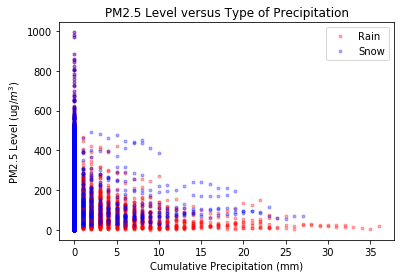

In [100]:
#plot scatter plot of 'pm2.5' vs 'ir' and 'is'
_ = plt.plot(pm_sr['ir'],pm_sr['pm2.5'], marker='.',linestyle='none',color='red',alpha=0.3)
_ = plt.plot(pm_sr['is'],pm_sr['pm2.5'], marker='.',linestyle='none',color='blue',alpha=0.3)
_ = plt.legend(('Rain','Snow'),loc='upper right')
_ = plt.xlabel('Cumulative Precipitation (mm)')
_ = plt.ylabel('PM2.5 Level (ug/$m^3$)')
_ = plt.title('PM2.5 Level versus Type of Precipitation')

Both rain and snow help to reduce extremely high PM2.5 readings, longer and larger precipitations lead to lower PM2.5 readings (better air quality). When compared together, rain is more effective at reducing PM2.5 levels than snow. 

## 7. Conclusion

### Evaluating PM2.5 measurement consistency across stations:
To understand PM2.5 reading consistency across stations, the interstation comparisons are performed by plotting the time series data and boxplot of PM2.5 levels. The comparisons reveal that PM2.5 readings are fairly consistent among nearby stations in all five cities, with reading peaks and valleys aligned and summary statistics comparable to each other. 

### Comparing PM2.5 levels among cities:
v 

## 8. Future Work

### Statistical EDAs 
* statistical analysis on daily PM2.5 levels, annual PM2.5 levels to EPA standards & recommendations 
https://www3.epa.gov/region1/airquality/pm-aq-standards.html
* hackers statistics and hypothesis testing on correlations between PM2.5 and weather parameters


### Fine tuning graphical EDAs
* add lines to indicate critical PM2.5 level by EPA: <br>
    Example codes for adding vertical lines: <br>
    _= plt.axvline(0.1, ymax=0.53, linewidth=2, color='black')
    _= plt.axvline(0.13, ymax=0.4, linewidth=3, color='black', linestyle='--')
    _= plt.axvline(0.07, ymax=0.68, linewidth=3, color='black', linestyle='--')

* add shading and annotation to highlight the figure features: <br>
    Example codes for adding shades to highlight: <br>
    fig, ax = plt.subplots(figsize=(8,5))
    _ = ax.scatter(x, y,alpha=0.2)
    _ = ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
    _ = ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)